# pyMelt: an open source python engine for mantle melting calculations
$^*$**Simon Matthews$^{1,2}$, Kevin Wong$^3$, et al.**  
$^1$Institute of Earth Sciences, University of Iceland, Sturlugata 7, Reykjavík 101, Iceland  
$^2$Department of Earth Sciences, University of Cambridge, Downing Street, Cambridge, UK  
$^3$University of Leeds, UK  
$^*$Corresponding author simonm@hi.is

## Abstract
This document is primarily a user guide for pyMelt and may one day become a more formal manuscript.

## 1. Introduction
Some text here.

## 2. Installing the module

Ultimately the module will be available on pip...

In [1]:
import sys
sys.path.append('../')
import pyMelt
import numpy as np
import matplotlib.pyplot as plt

## 3. Melting behaviour of pure lithologies

Each lithology exists as a python class, meaning that a python object for each lithology must be generated before any calculations are performed. This can be done like so:

In [2]:
lherzolite = pyMelt.lithologies.matthews.klb1()

There are many other lithology models available:  

From [matthews2021]:
- klb1: *a lherzolite*
- kg1: *an experimental composition made from a mixture of eclogite and lherzolite, classified as a silica-undersaturated pyroxenite*
- eclogite: *calibrated on a range of bulk compositions, all of which are classified as silica-saturated pyroxenites*  

From [katz2003]:
- lherzolite: *calibrated on a wide range of peridotite compositions. This is the anhydrous version of the model.*

From [shorttle2014]:
- kg1: *as above, though suitable for use over a more restricted pressure range*
- harzburgite: *a non-melting lithology*

From [pertermann2002]:
- g2: *a silica-saturated pyroxenite (or eclogite) experimental composition*

We can extract directly the temperature (°C) of the solidus and liquidus at any particular pressure, at 2 GPa:

In [3]:
lherzolite.TSolidus(2.0)

1397.5733298733503

In [4]:
lherzolite.TLiquidus(2.0)

1911.2678949281221

We can also calculate directly the melt fraction at a choice of pressure and temperature:

In [5]:
lherzolite.F(2.0, 1450.0)

0.1864571893891539

Notice that the order we passed the pressure and temperature were very important, but how to know which order the arguments should be given? Check the documentation, like so:

In [6]:
lherzolite.F?

Signature: lherzolite.F(P, T)
Docstring:
Wrapper for the melt fraction functions. If T and P are below the solidus,
returns 0, if they are above the liquidus, returns 1. If below the temperature
of cpx-exhaustion, calls the Fcpx function, otherwise calls the Fopx function.

Parameters
----------
P : float
    Pressure (GPa).
T : float
    Temperature (degC).

Returns
-------
float
    Melt fraction.
File:      ~/repos/pyMelt/pyMelt/lithologies/matthews.py
Type:      method


### 3.1 Comparison between different lithologies
We can also directly compare some different lithologies over pressure-temperature space by setting up a loop:

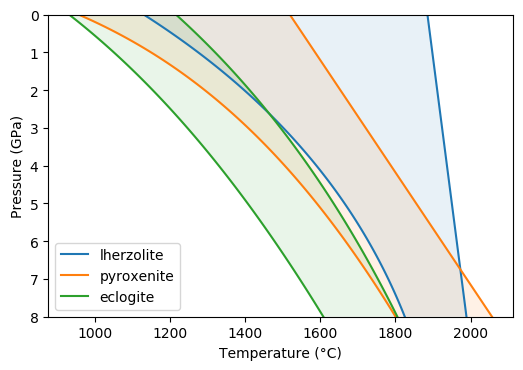

In [7]:
pyroxenite = pyMelt.lithologies.matthews.kg1()
eclogite = pyMelt.lithologies.matthews.eclogite()

p = np.linspace(8.0,0.0,101)
t = np.zeros([np.shape(p)[0],6])

for i in range(len(p)):
    t[i,0] = lherzolite.TSolidus(p[i])
    t[i,1] = lherzolite.TLiquidus(p[i])
    t[i,2] = pyroxenite.TSolidus(p[i])
    t[i,3] = pyroxenite.TLiquidus(p[i])
    t[i,4] = eclogite.TSolidus(p[i])
    t[i,5] = eclogite.TLiquidus(p[i])

f,a = plt.subplots(dpi=100)

a.plot(t[:,0], p, c='C0', label='lherzolite')
a.plot(t[:,1], p, c='C0')
a.fill_betweenx(p,t[:,0],t[:,1], facecolor='C0', alpha=0.1)

a.plot(t[:,2], p, c='C1', label='pyroxenite')
a.plot(t[:,3], p, c='C1')
a.fill_betweenx(p,t[:,2],t[:,3], facecolor='C1', alpha=0.1)

a.plot(t[:,4], p, c='C2', label='eclogite')
a.plot(t[:,5], p, c='C2')
a.fill_betweenx(p,t[:,4],t[:,5], facecolor='C2', alpha=0.1)

a.legend()

a.set_xlabel('Temperature (°C)')
a.set_ylabel('Pressure (GPa)')

a.set_ylim(np.max(p),np.min(p))

plt.show()

We can also look at the evolution of melt fraction for isobaric melting at 2 GPa:

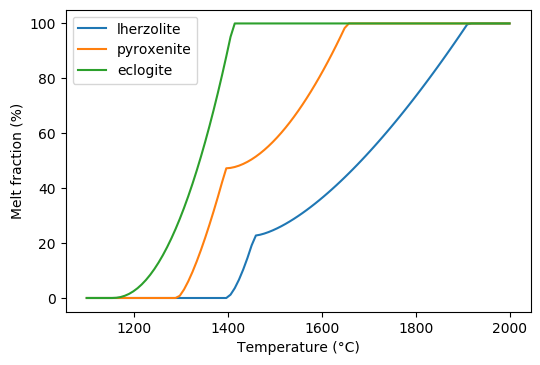

In [8]:
t = np.linspace(1100,2000,101)

F = np.zeros([len(t),3])

for i in range(len(t)):
    F[i,0] = lherzolite.F(2.0, t[i])
    F[i,1] = pyroxenite.F(2.0, t[i])
    F[i,2] = eclogite.F(2.0, t[i])

f,a = plt.subplots(dpi=100)

a.plot(t, F[:,0]*100, label='lherzolite')
a.plot(t, F[:,1]*100, label='pyroxenite')
a.plot(t, F[:,2]*100, label='eclogite')

a.set_xlabel('Temperature (°C)')
a.set_ylabel('Melt fraction (%)')

a.legend()

plt.show()

### 3.2 Comparison between different lherzolite models

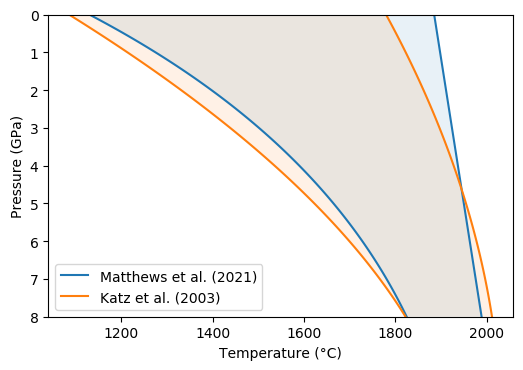

In [9]:
katz_lz = pyMelt.lithologies.katz.lherzolite()

p = np.linspace(8.0,0.0,101)
t = np.zeros([np.shape(p)[0],4])

for i in range(len(p)):
    t[i,0] = lherzolite.TSolidus(p[i])
    t[i,1] = lherzolite.TLiquidus(p[i])
    t[i,2] = katz_lz.TSolidus(p[i])
    t[i,3] = katz_lz.TLiquidus(p[i])

f,a = plt.subplots(dpi=100)

a.plot(t[:,0], p, c='C0', label='Matthews et al. (2021)')
a.plot(t[:,1], p, c='C0')
a.fill_betweenx(p,t[:,0],t[:,1], facecolor='C0', alpha=0.1)

a.plot(t[:,2], p, c='C1', label='Katz et al. (2003)')
a.plot(t[:,3], p, c='C1')
a.fill_betweenx(p,t[:,2],t[:,3], facecolor='C1', alpha=0.1)

a.legend()

a.set_xlabel('Temperature (°C)')
a.set_ylabel('Pressure (GPa)')

a.set_ylim(np.max(p),np.min(p))

plt.show()

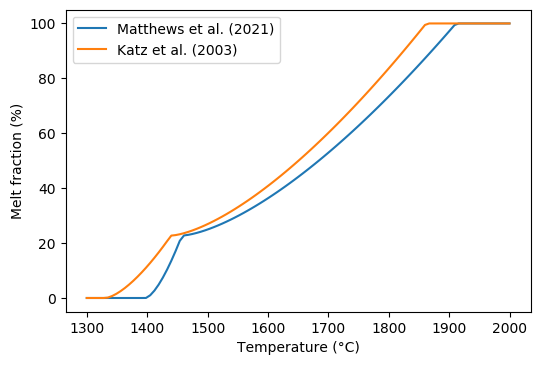

In [10]:
t = np.linspace(1300,2000,101)

F = np.zeros([len(t),2])

for i in range(len(t)):
    F[i,0] = lherzolite.F(2.0, t[i])
    F[i,1] = katz_lz.F(2.0, t[i])

f,a = plt.subplots(dpi=100)

a.plot(t, F[:,0]*100, label='Matthews et al. (2021)')
a.plot(t, F[:,1]*100, label='Katz et al. (2003)')

a.set_xlabel('Temperature (°C)')
a.set_ylabel('Melt fraction (%)')

a.legend()

plt.show()

### 3.3 Comparison between different silica-undersaturated pyroxenite models

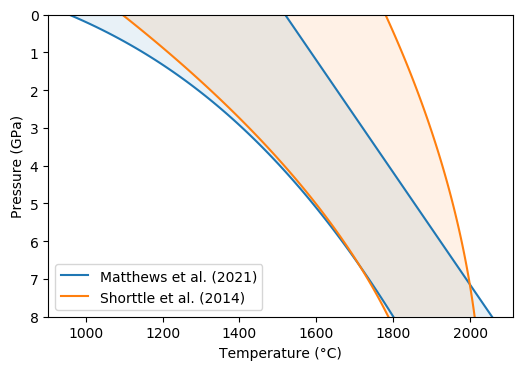

In [11]:
shorttle_px = pyMelt.lithologies.shorttle.kg1()

p = np.linspace(8.0,0.0,101)
t = np.zeros([np.shape(p)[0],4])

for i in range(len(p)):
    t[i,0] = pyroxenite.TSolidus(p[i])
    t[i,1] = pyroxenite.TLiquidus(p[i])
    t[i,2] = shorttle_px.TSolidus(p[i])
    t[i,3] = shorttle_px.TLiquidus(p[i])

f,a = plt.subplots(dpi=100)

a.plot(t[:,0], p, c='C0', label='Matthews et al. (2021)')
a.plot(t[:,1], p, c='C0')
a.fill_betweenx(p,t[:,0],t[:,1], facecolor='C0', alpha=0.1)

a.plot(t[:,2], p, c='C1', label='Shorttle et al. (2014)')
a.plot(t[:,3], p, c='C1')
a.fill_betweenx(p,t[:,2],t[:,3], facecolor='C1', alpha=0.1)

a.legend()

a.set_xlabel('Temperature (°C)')
a.set_ylabel('Pressure (GPa)')

a.set_ylim(np.max(p),np.min(p))

plt.show()

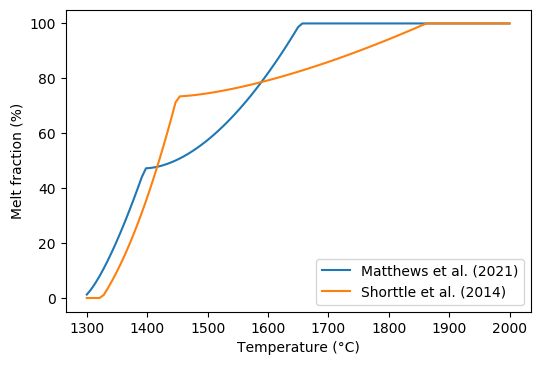

In [12]:
t = np.linspace(1300,2000,101)

F = np.zeros([len(t),2])

for i in range(len(t)):
    F[i,0] = pyroxenite.F(2.0, t[i])
    F[i,1] = shorttle_px.F(2.0, t[i])

f,a = plt.subplots(dpi=100)

a.plot(t, F[:,0]*100, label='Matthews et al. (2021)')
a.plot(t, F[:,1]*100, label='Shorttle et al. (2014)')

a.set_xlabel('Temperature (°C)')
a.set_ylabel('Melt fraction (%)')

a.legend()

plt.show()

### 3.3 Comparison between silica-saturated pyroxenites

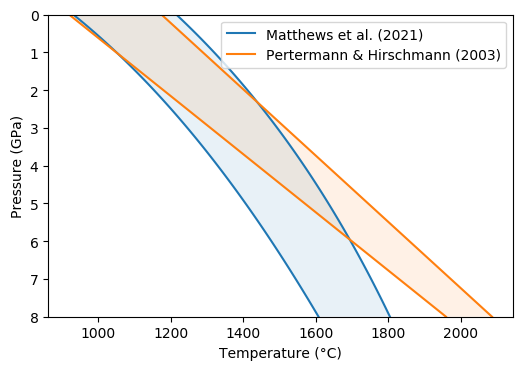

In [13]:
ph_px = pyMelt.lithologies.pertermann.g2()

p = np.linspace(8.0,0.0,101)
t = np.zeros([np.shape(p)[0],4])

for i in range(len(p)):
    t[i,0] = eclogite.TSolidus(p[i])
    t[i,1] = eclogite.TLiquidus(p[i])
    t[i,2] = ph_px.TSolidus(p[i])
    t[i,3] = ph_px.TLiquidus(p[i])

f,a = plt.subplots(dpi=100)

a.plot(t[:,0], p, c='C0', label='Matthews et al. (2021)')
a.plot(t[:,1], p, c='C0')
a.fill_betweenx(p,t[:,0],t[:,1], facecolor='C0', alpha=0.1)

a.plot(t[:,2], p, c='C1', label='Pertermann & Hirschmann (2003)')
a.plot(t[:,3], p, c='C1')
a.fill_betweenx(p,t[:,2],t[:,3], facecolor='C1', alpha=0.1)

a.legend()

a.set_xlabel('Temperature (°C)')
a.set_ylabel('Pressure (GPa)')

a.set_ylim(np.max(p),np.min(p))

plt.show()

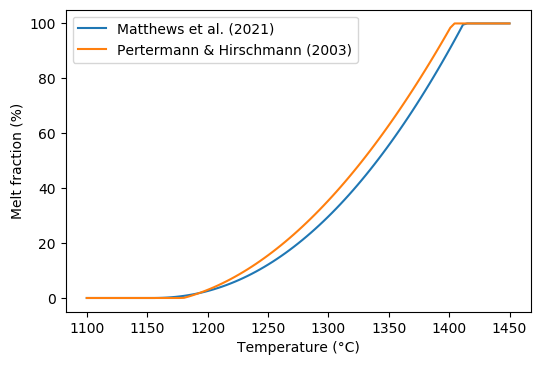

In [14]:
t = np.linspace(1100,1450,101)

F = np.zeros([len(t),2])

for i in range(len(t)):
    F[i,0] = eclogite.F(2.0, t[i])
    F[i,1] = ph_px.F(2.0, t[i])

f,a = plt.subplots(dpi=100)

a.plot(t, F[:,0]*100, label='Matthews et al. (2021)')
a.plot(t, F[:,1]*100, label='Pertermann & Hirschmann (2003)')

a.set_xlabel('Temperature (°C)')
a.set_ylabel('Melt fraction (%)')

a.legend()

plt.show()

## 4. Melting behaviour of multi-component mantle

Similarly to how we can define and manipulate lithology objects, we define a mantle object based on the mantle class. The mantle object consists of lithology objects, their proportions, and their names:

In [15]:
mantle = pyMelt.mantle([lherzolite, pyroxenite], [0.9, 0.1], ['lherzolite', 'pyroxenite'])

Here we define a bi-lithologic mantlel; however, the code supports an unlimited number of lithologies. For example, [matthews2021] and [matthews2016] used this functionality to calculate melting behaviour for a lherzolite-pyroxenite-harzburgite mantle. 

The module can calculate the evolution of temperature and melt fraction during adiabatic decompression melting. In all cases complete thermal equilibrium and complete chemical disequilibrium are assumed, following the formulation of [phippsmorgan2001]. The calculation is controlled by the potential temperature $T_p$, the temperature that a packet of solid mantle will have upon decompression to the surface without chemical change. The temperature decreases during this decompression due to thermal expansion.

In [16]:
melting_column = mantle.AdiabaticMelt_1D(1350.0)

There is an inbuilt function for visualising the results:

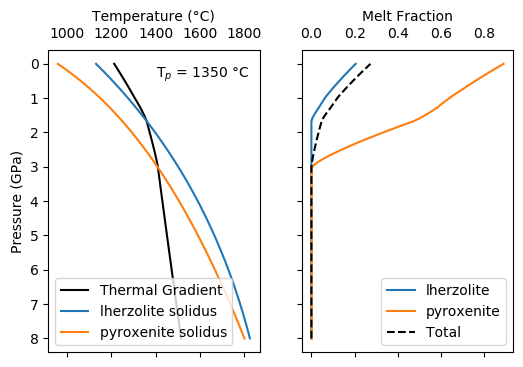

In [17]:
f,a = melting_column.plot()

The crustal thickness can be calculated by integrating over the results:

In [18]:
melting_column.integrate_tri()

8.133675142636347

We can also inspect the contribution of the two lithologies to the crustal thickness:

In [19]:
melting_column.tc_lithology_contributions

array([0.4610501, 0.5389499])

In [20]:
harzburgite = pyMelt.lithologies.shorttle.harzburgite()
mantle = pyMelt.mantle([lherzolite, pyroxenite, harzburgite], 
                       [0.9, 0.1, 0.5], 
                       ['lherzolite', 'pyroxenite', 'harzburgite'])

In [21]:
melting_column = mantle.AdiabaticMelt_1D(1350.0)

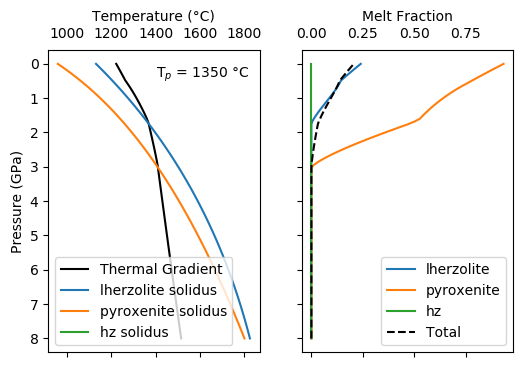

In [22]:
f,a = melting_column.plot()

In [23]:
melting_column.integrate_tri()

6.385339476346023

In [24]:
melting_column.tc_lithology_contributions

array([0.51726979, 0.48273021, 0.        ])

## 5. Solving inverse problems

## 6. Summary

### Acknowledgements

### References